Importing the Dataset to colab


In [0]:
from google.colab import files
uploaded = files.upload()

Saving phishing.csv to phishing.csv


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.svm import SVC
#from sklearn.externals import joblib
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,roc_curve,auc, confusion_matrix
from sklearn import preprocessing
#Seaborn is a Python data visualization library based on matplotlib
import seaborn as sns


In [0]:
#easy simple parallel computing
pip install joblib


In [0]:
# Creating the dataframe  
dataset = pd.read_csv("phishing.csv") 
  
# Print the dataframe 
dataset.head(3)

,id,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,port,HTTPS_token,Request_URL,URL_of_Anchor,Links_in_tags,SFH,Submitting_to_email,Abnormal_URL,Redirect,on_mouseover,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,-1,1,1,1,-1,-1,-1,-1,-1,1,1,-1,1,-1,1,-1,-1,-1,0,1,1,1,1,-1,-1,-1,-1,1,1,-1,-1
1,2,1,1,1,1,1,-1,0,1,-1,1,1,-1,1,0,-1,-1,1,1,0,1,1,1,1,-1,-1,0,-1,1,1,1,-1
2,3,1,0,1,1,1,-1,-1,-1,-1,1,1,-1,1,0,-1,-1,-1,-1,0,1,1,1,1,1,-1,1,-1,1,0,-1,-1


In [0]:
#print the full summary 
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 32 columns):
id                             11055 non-null int64
having_IP_Address              11055 non-null int64
URL_Length                     11055 non-null int64
Shortining_Service             11055 non-null int64
having_At_Symbol               11055 non-null int64
double_slash_redirecting       11055 non-null int64
Prefix_Suffix                  11055 non-null int64
having_Sub_Domain              11055 non-null int64
SSLfinal_State                 11055 non-null int64
Domain_registeration_length    11055 non-null int64
Favicon                        11055 non-null int64
port                           11055 non-null int64
HTTPS_token                    11055 non-null int64
Request_URL                    11055 non-null int64
URL_of_Anchor                  11055 non-null int64
Links_in_tags                  11055 non-null int64
SFH                            11055 non-null int64
Submitt

In [0]:
# Describe statistical information of data
print(dataset.describe())

                 id  having_IP_Address  ...  Statistical_report        Result
count  11055.000000       11055.000000  ...        11055.000000  11055.000000
mean    5528.000000           0.313795  ...            0.719584      0.113885
std     3191.447947           0.949534  ...            0.694437      0.993539
min        1.000000          -1.000000  ...           -1.000000     -1.000000
25%     2764.500000          -1.000000  ...            1.000000     -1.000000
50%     5528.000000           1.000000  ...            1.000000      1.000000
75%     8291.500000           1.000000  ...            1.000000      1.000000
max    11055.000000           1.000000  ...            1.000000      1.000000

[8 rows x 32 columns]


In [0]:
# Look for missing values
print(dataset.isnull().sum())   

id                             0
having_IP_Address              0
URL_Length                     0
Shortining_Service             0
having_At_Symbol               0
double_slash_redirecting       0
Prefix_Suffix                  0
having_Sub_Domain              0
SSLfinal_State                 0
Domain_registeration_length    0
Favicon                        0
port                           0
HTTPS_token                    0
Request_URL                    0
URL_of_Anchor                  0
Links_in_tags                  0
SFH                            0
Submitting_to_email            0
Abnormal_URL                   0
Redirect                       0
on_mouseover                   0
RightClick                     0
popUpWidnow                    0
Iframe                         0
age_of_domain                  0
DNSRecord                      0
web_traffic                    0
Page_Rank                      0
Google_Index                   0
Links_pointing_to_page         0
Statistica

2569 times 0 repeated in Result
2655 times -1 repeated in Result
5831 times 1 repeated in Result


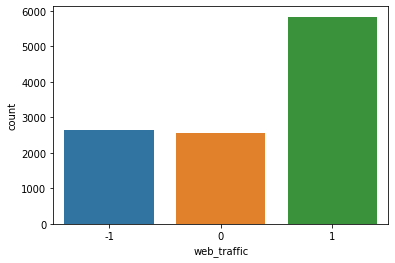

In [0]:
#Calculating the number of 0's 1's and -1's in a specific attribute

a=len(dataset[dataset.web_traffic==0])
b=len(dataset[dataset.web_traffic==-1])
c=len(dataset[dataset.web_traffic==1])
print(a,"times 0 repeated in Result")
print(b,"times -1 repeated in Result")
print(c,"times 1 repeated in Result")
sns.countplot(dataset['web_traffic'])

1167 times 0 repeated in Result
3557 times -1 repeated in Result
6331 times 1 repeated in Result


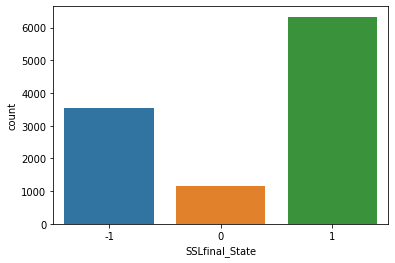

In [0]:
a=len(dataset[dataset.SSLfinal_State==0])
b=len(dataset[dataset.SSLfinal_State==-1])
c=len(dataset[dataset.SSLfinal_State==1])
print(a,"times 0 repeated in Result")
print(b,"times -1 repeated in Result")
print(c,"times 1 repeated in Result")
sns.countplot(dataset['SSLfinal_State'])

In [0]:
# Generate correlation matrix
print(dataset.corr())

                                   id  ...    Result
id                           1.000000  ...  0.000978
having_IP_Address           -0.388317  ...  0.094160
URL_Length                   0.006105  ...  0.057430
Shortining_Service          -0.006281  ... -0.067966
having_At_Symbol            -0.169478  ...  0.052948
double_slash_redirecting    -0.003363  ... -0.038608
Prefix_Suffix               -0.007340  ...  0.348606
having_Sub_Domain            0.234091  ...  0.298323
SSLfinal_State              -0.006682  ...  0.714741
Domain_registeration_length -0.001180  ... -0.225789
Favicon                      0.007293  ... -0.000280
port                         0.001656  ...  0.036419
HTTPS_token                  0.002916  ... -0.039854
Request_URL                 -0.000862  ...  0.253372
URL_of_Anchor               -0.005071  ...  0.692935
Links_in_tags               -0.028865  ...  0.248229
SFH                          0.085354  ...  0.221419
Submitting_to_email          0.005828  ...  0.

The heatmap is a way of representing the data in a 2-dimensional form. The data values are represented as colors in the graph. The goal of the heatmap is to provide a colored visual summary of information.


Domain_registeration_length   -0.225789
Shortining_Service            -0.067966
Abnormal_URL                  -0.060488
HTTPS_token                   -0.039854
double_slash_redirecting      -0.038608
Redirect                      -0.020113
Iframe                        -0.003394
Favicon                       -0.000280
popUpWidnow                    0.000086
id                             0.000978
RightClick                     0.012653
Submitting_to_email            0.018249
Links_pointing_to_page         0.032574
port                           0.036419
on_mouseover                   0.041838
having_At_Symbol               0.052948
URL_Length                     0.057430
DNSRecord                      0.075718
Statistical_report             0.079857
having_IP_Address              0.094160
Page_Rank                      0.104645
age_of_domain                  0.121496
Google_Index                   0.128950
SFH                            0.221419
Links_in_tags                  0.248229


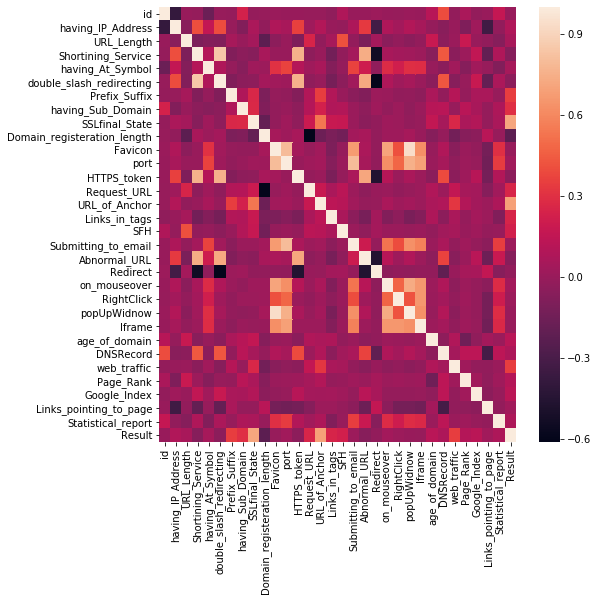

In [0]:
plt.figure(figsize =(8,8))
sns.heatmap(dataset.corr())    # Generate heatmap (though very less clarity due to large no. of ftrs

print(dataset.corr()['Result'].sort_values())      # Print correlation with target variable



In [0]:
# Remove features having correlation coeff. between +/- 0.03
dataset.drop(['Favicon','Iframe','Redirect','popUpWidnow','RightClick','Submitting_to_email'],axis=1,inplace=True)


The training set is a subset of the data set used to train a model.

x_train is the training data set.

y_train is the set of labels to all the data in x_train.

The test set is a subset of the data set that you use to test your model after the model has gone through initial vetting by the validation set.

x_test is the test data set.

y_test is the set of labels to all the data in x_test.

when random_state set to an integer, train_test_split will return same results for each execution.

when random_state set to an None, train_test_split will return different results for each execution.

In [0]:
# Prepare data for models
y = dataset['Result'].values
X = dataset.drop(['Result',], axis = 1)


# Split the data as training and testing data - 70% train size, 30% test size and random state is none means it splits the data randomly
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size = 0.30, random_state = None)

In [0]:
#1 Classification using Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc = rfc.fit(X_train,y_train)
prediction = rfc.predict(X_test)
acc_RF =accuracy_score(y_test, prediction)
print("Accuracy with RF classifier:",acc_RF) 
fpr,tpr,thresh = roc_curve(y_test,prediction)      
roc_auc = accuracy_score(y_test,prediction)         # Calculate ROC AUC

Accuracy with RF classifier: 0.9683448899608079


Conf matrix RF classifier:
 [[1428   63]
 [  42 1784]]


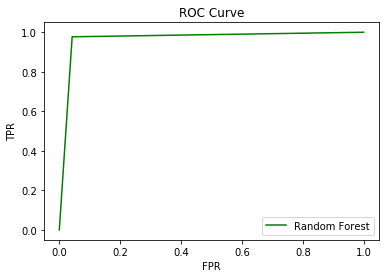

In [0]:
# Plot ROC curve for Random Forest
plt.plot(fpr,tpr,'g',label = 'Random Forest')
plt.legend("Random Forest", loc='lower right')
plt.legend(loc='lower right')
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.title('ROC Curve')
binary=confusion_matrix(y_test,prediction)
print("Conf matrix RF classifier:\n",confusion_matrix(y_test,prediction))  #  Generate confusion matrix


Accuracy with SVM-Linear: 0.9273439855290926
Conf matrix SVM-linear: [[1333  158]
 [  83 1743]]


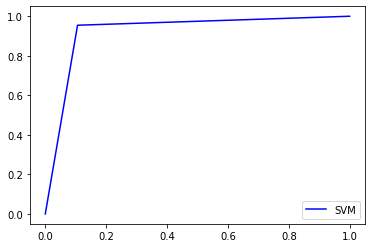

In [0]:
#2 Classification using SVM
from sklearn.svm import SVC
#c is a regularization parameter
svc_l = SVC(kernel = "linear", C = 0.025)
svc_l = svc_l.fit(X_train,y_train)
prediction = svc_l.predict(X_test)
acc_svm = accuracy_score(y_test, prediction)
print("Accuracy with SVM-Linear:",acc_svm)
fpr,tpr,thresh = roc_curve(y_test,prediction)
roc_auc = accuracy_score(y_test,prediction)

# Plot ROC curve for SVM-linear
plt.plot(fpr,tpr,'b',label = 'SVM')
plt.legend("SVM", loc ='lower right')
plt.legend(loc ='lower right')
print("Conf matrix SVM-linear:",confusion_matrix(y_test,prediction))

plt.show()

,id,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,port,HTTPS_token,Request_URL,URL_of_Anchor,Links_in_tags,SFH,Abnormal_URL,on_mouseover,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
count,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000
mean,5528.000000,0.313795,-0.633198,0.738761,0.700588,0.741474,-0.734962,0.063953,0.250927,-0.336771,0.728268,0.675079,0.186793,-0.076526,-0.118137,-0.595749,0.705292,0.762099,0.061239,0.377114,0.287291,-0.483673,0.721574,0.344007,0.719584,0.113885
std,3191.447947,0.949534,0.766095,0.673998,0.713598,0.671011,0.678139,0.817518,0.911892,0.941629,0.685324,0.737779,0.982444,0.715138,0.763973,0.759143,0.708949,0.647490,0.998168,0.926209,0.827733,0.875289,0.692369,0.569944,0.694437,0.993539
min,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,2764.500000,-1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,1.000000,-1.000000,-1.000000,0.000000,-1.000000,1.000000,0.000000,1.000000,-1.000000
50%,5528.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,0.000000,1.000000,1.000000
75%,8291.500000,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,11055.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


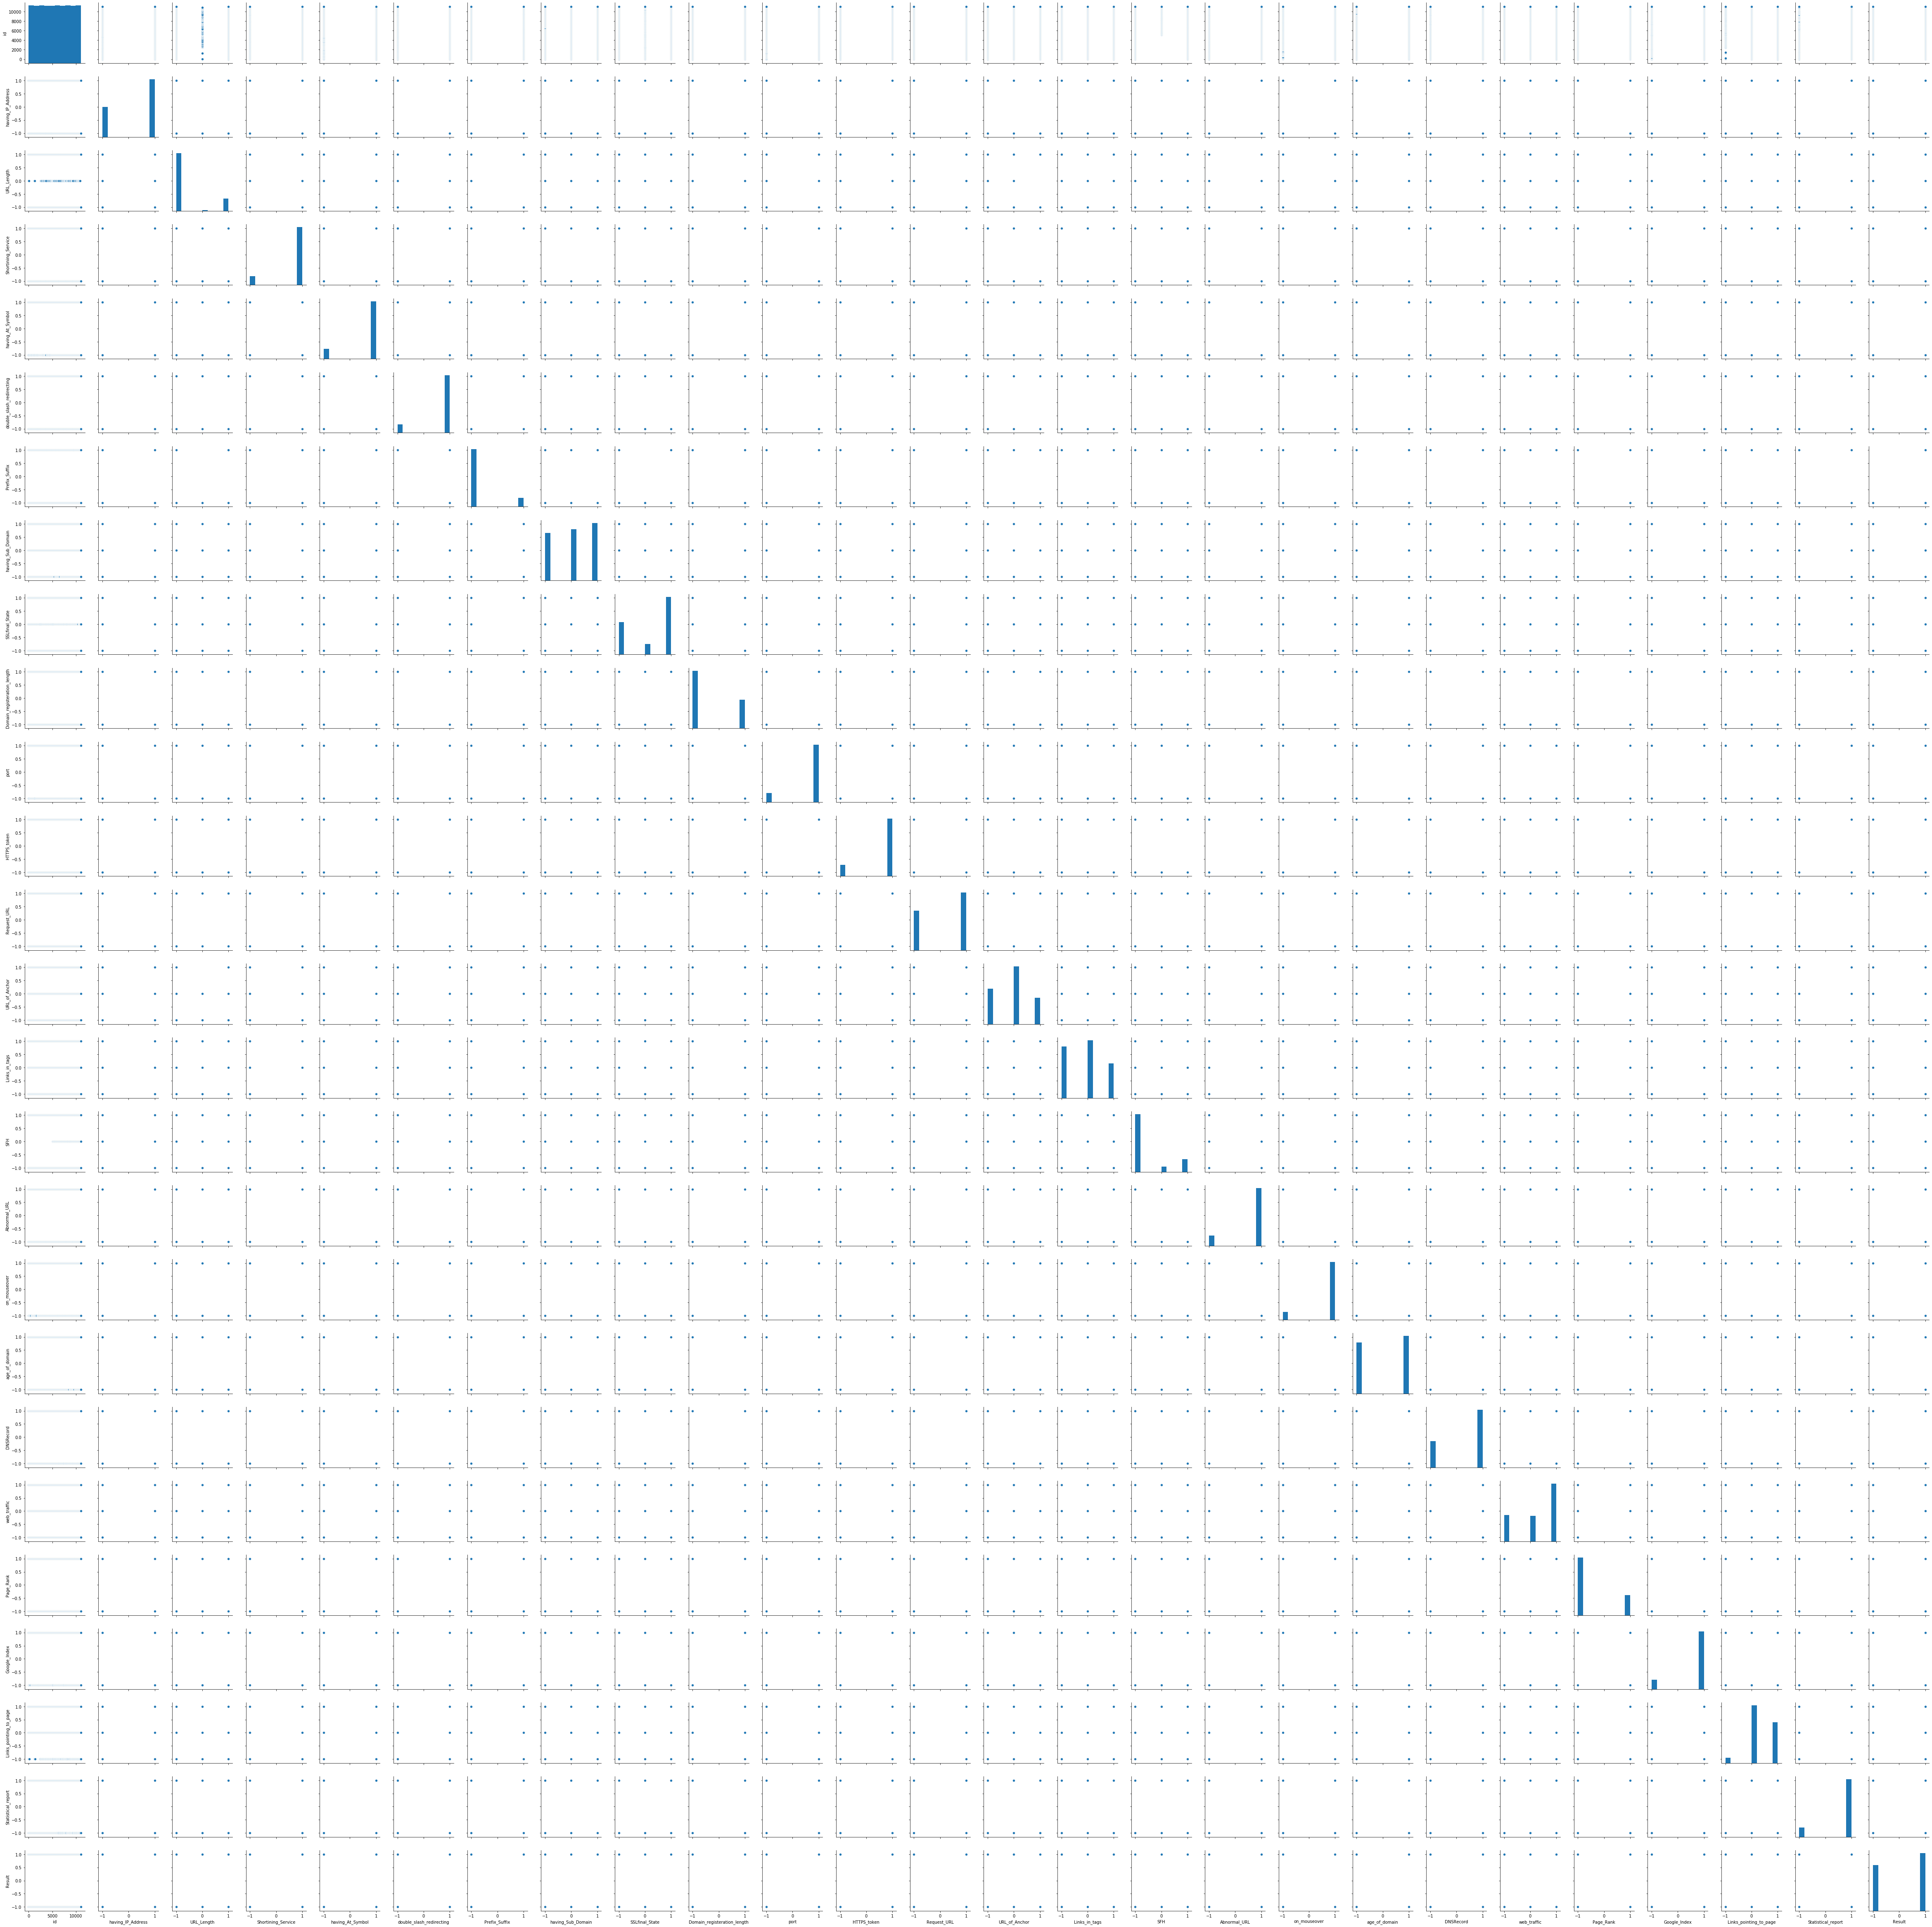

In [0]:
sns.pairplot(dataset)
dataset.describe()

In [0]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier

[[1405   86]
 [  64 1762]]
              precision    recall  f1-score   support

          -1       0.96      0.94      0.95      1491
           1       0.95      0.96      0.96      1826

    accuracy                           0.95      3317
   macro avg       0.95      0.95      0.95      3317
weighted avg       0.95      0.95      0.95      3317



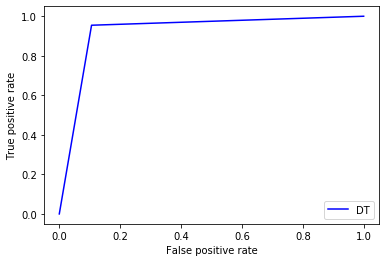

In [0]:
#3 Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
acc_DT= accuracy_score(y_test, y_pred)
# Plot ROC curve for decsion tree
plt.plot(fpr,tpr,'b',label = 'DT')
plt.legend("DT", loc ='lower right')
plt.legend(loc ='lower right')
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")

plt.show()

In [0]:
# Model Accuracy, how often is the classifier correct?
print("Conf matrix Decsion Tree:\n",confusion_matrix(y_test,prediction))
print("Accuracy:",accuracy_score(y_test, y_pred))

Conf matrix Decsion Tree:
 [[1333  158]
 [  83 1743]]
Accuracy: 0.9547784142297256


In [0]:
from sklearn.feature_selection import RFE
rfe = RFE(rfc,27)                              
rfe = rfe.fit(X_train, y_train)               # Train RF classifier with only 27 features now
pred = rfe.predict(X_test)
acc_RF_rem =accuracy_score(y_test,pred)
# Test accuracy on reduced data
print("Accuracy by RFClassifier after RFE is applied:",acc_RF_rem )

rfe = RFE(svc_l,27)
rfe = rfe.fit(X_train, y_train)               # Train SVM with only 27 features now
pred = rfe.predict(X_test)
acc_svm_rem =accuracy_score(y_test,pred)
print("Accuracy by SVM after RFE is applied:", acc_svm_rem)


Accuracy by RFClassifier after RFE is applied: 0.970756707868556
Accuracy by SVM after RFE is applied: 0.9273439855290926


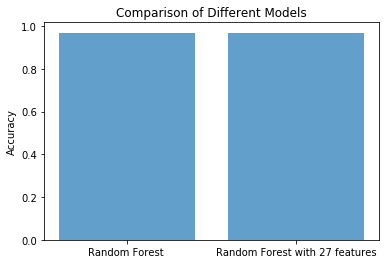

In [0]:
#Comparing performance of all RF with less features
objects = ('Random Forest ','Random Forest with 27 features')
y_pos = np.arange(len(objects))
performance = [acc_RF,acc_RF_rem]

plt.bar(y_pos, performance, align='center', alpha=0.7)
plt.xticks(y_pos, objects)
plt.ylabel('Accuracy')
plt.title('Comparison of Different Models')

plt.show()

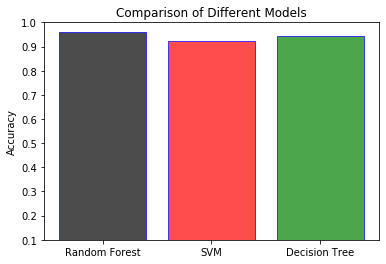

In [0]:
#Comparing performance of all models
objects = ('Random Forest','SVM','Decision Tree')
y_pos = np.arange(len(objects))
performance = [acc_RF,acc_svm,acc_DT]

plt.bar(y_pos, performance, align='center', alpha=0.7,width=0.8 ,color=['black', 'red', 'green'], edgecolor='blue')
plt.xticks(y_pos, objects)
plt.ylabel('Accuracy')
plt.title('Comparison of Different Models')
plt.ylim(0.1,1.0) 
#plt.xlim()
#plt.ylim(0.1, 0.2, 0.3, 0.4, 0.5,0.6,0.7,0.8,0.9,1.0)
plt.show()

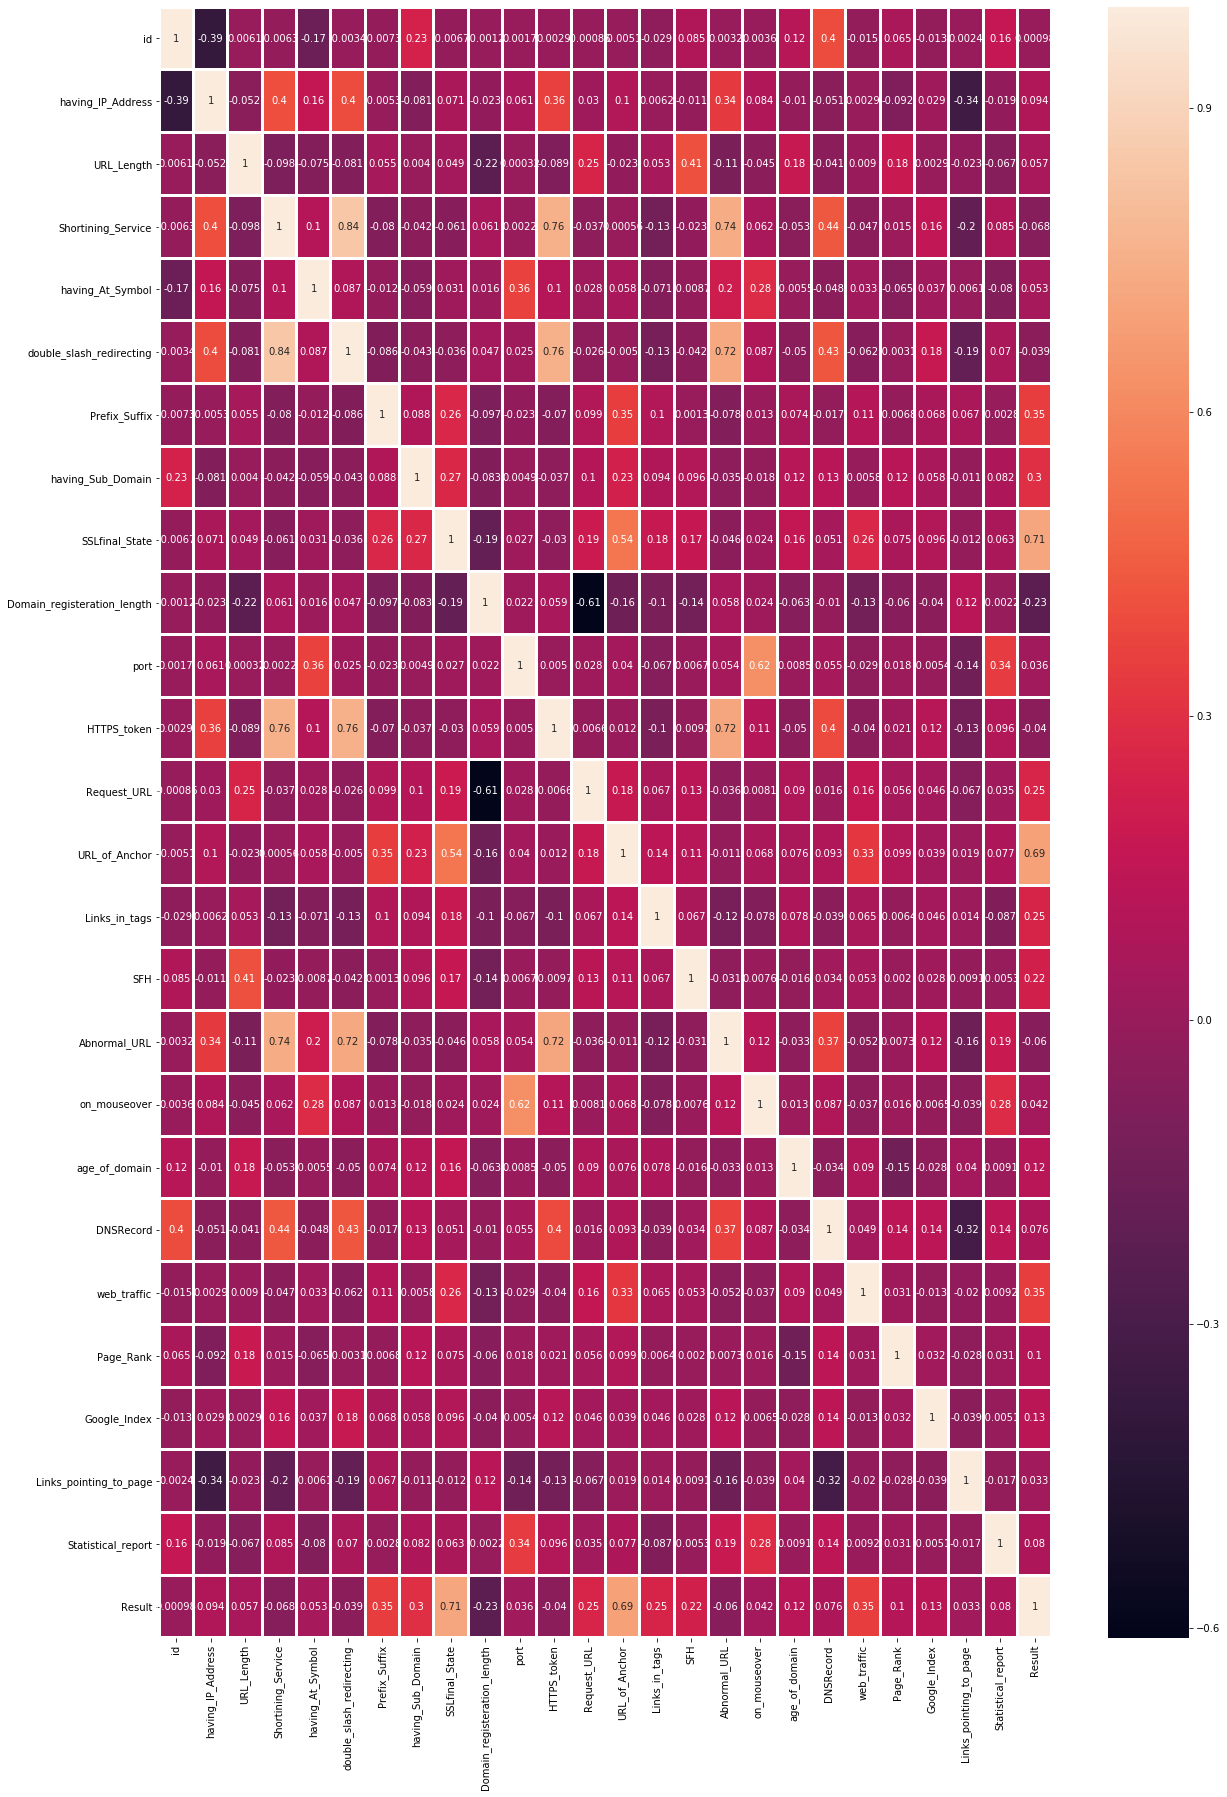

In [0]:

fig, ax = plt.subplots(figsize=(20,30))
sns.heatmap(dataset.corr(), annot=True,linewidths=2)